In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("C:/Users/LENOVO/Downloads/archive/Train_data.csv")
test = pd.read_csv("C:/Users/LENOVO/Downloads/archive/Test_data.csv")

#print(train.isnull().sum())
#print(test.isnull().sum())  #결측값 없음

train['class'] = train['class'].apply(lambda x: 0 if x == 'normal' else 1)
train['class'] = train['class'].astype(int)  

print(train['class'].head())

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int32


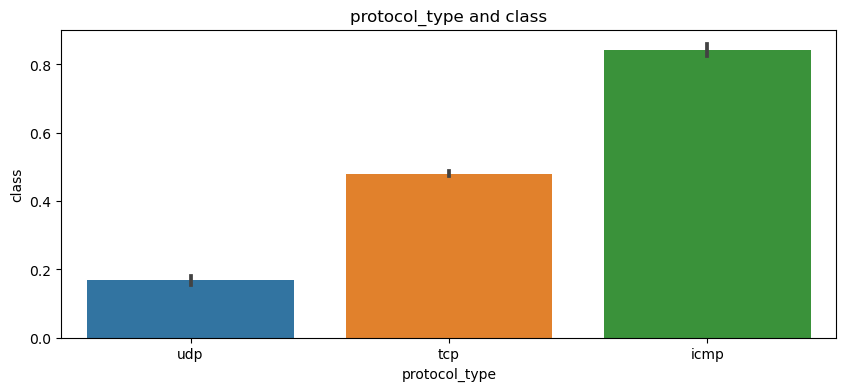

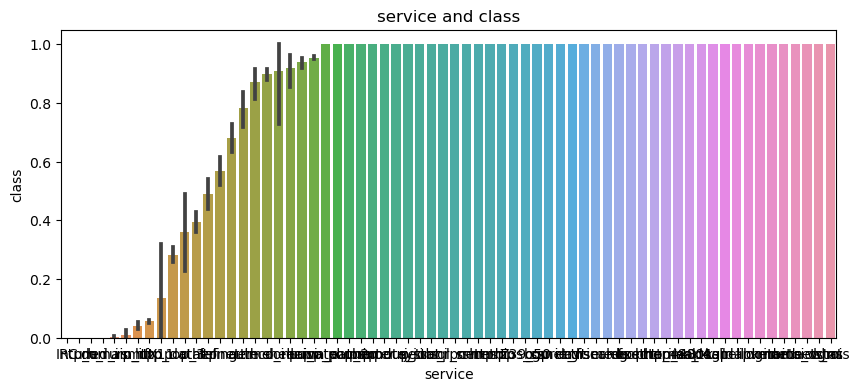

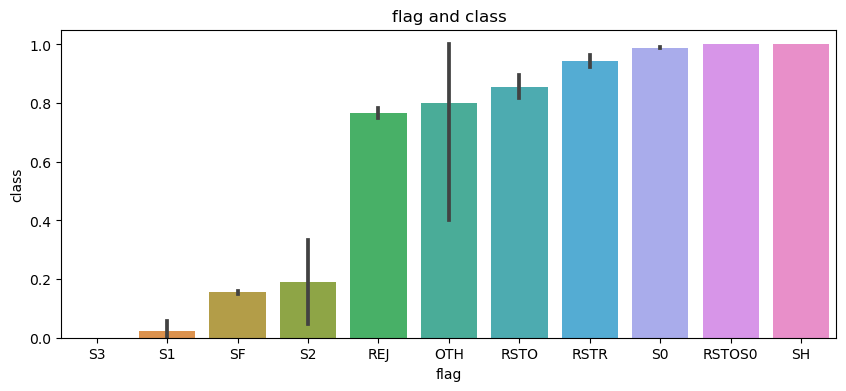

In [10]:
def class_bar_plot(feature):
    plt.figure(figsize=(10, 4))
    sorted_data = train.groupby(feature)['class'].mean().sort_values().index
    sns.barplot(data=train, x=feature, y="class", order=sorted_data).set_title(f"{feature} and class")
    plt.show()

class_bar_plot('protocol_type')       
class_bar_plot('service')
class_bar_plot('flag')

In [20]:
sorted_protocol_list = train.groupby('protocol_type')['class'].mean().sort_values().index.tolist()
print(sorted_protocol_list)
sorted_service_list = train.groupby('service')['class'].mean().sort_values().index.tolist()
print(sorted_service_list)
sorted_flag_list = train.groupby('flag')['class'].mean().sort_values().index.tolist()
print(sorted_flag_list)
unique_services = list(set(train['service'].unique()).union(set(test['service'].unique())))
for index, service in enumerate(unique_services):
    train.loc[(train['service'] == service), 'service'] = index
    test.loc[(test['service'] == service), 'service'] = index
for index, protocol_type in enumerate(['udp', 'tcp', 'icmp']):     
    train.loc[(train['protocol_type'] == protocol_type), 'protocol_type'] = index
    test.loc[(test['protocol_type'] == protocol_type), 'protocol_type'] = index
for index, service in enumerate(['IRC', 'urh_i', 'ntp_u', 'red_i', 'domain_u', 'urp_i', 'smtp', 'http', 'X11', 'ftp_data', 'pop_3', 'other', 'ftp', 'telnet', 'finger', 'auth', 'time', 'eco_i', 'shell', 'domain', 'ecr_i', 'private', 'exec', 'daytime', 'efs', 'echo', 'discard', 'bgp', 'ctf', 'csnet_ns', 'courier', 'Z39_50', 'login', 'link', 'ldap', 'kshell', 'klogin', 'iso_tsap', 'imap4', 'http_8001', 'http_443', 'hostnames', 'gopher', 'nnsp', 'nntp', 'mtp', 'netbios_dgm', 'name', 'printer', 'pop_2', 'pm_dump', 'netbios_ns', 'netbios_ssn', 'netstat', 'rje', 'remote_job', 'supdup', 'sunrpc', 'ssh', 'sql_net', 'tim_i', 'systat', 'uucp', 'uucp_path', 'vmnet', 'whois']):
    train.loc[(train['service'] == service), 'service'] = index
    test.loc[(test['service'] == service), 'service'] = index          
for index, flag in enumerate(['S3', 'S1', 'SF', 'S2', 'REJ', 'OTH', 'RSTO', 'RSTR', 'S0', 'RSTOS0', 'SH']):
    train.loc[(train['flag'] == flag), 'flag'] = index
    test.loc[(test['flag'] == flag), 'flag'] = index          
    
train['protocol_type'] = train['protocol_type'].astype(int)
train['service'] = train['service'].astype(int)
train['flag'] = train['flag'].astype(int)

test['protocol_type'] = test['protocol_type'].astype(int)
test['service'] = test['service'].astype(int)
test['flag'] = test['flag'].astype(int)

[0, 1, 2]
[48, 21, 51, 50, 56, 37, 17, 9, 42, 0, 10, 49, 58, 55, 5, 25, 15, 33, 62, 7, 66, 52, 45, 46, 47, 8, 6, 4, 53, 54, 3, 2, 57, 1, 59, 60, 61, 63, 64, 44, 43, 19, 41, 20, 16, 22, 23, 24, 14, 26, 27, 28, 29, 30, 31, 32, 65, 34, 35, 36, 13, 38, 39, 40, 18, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

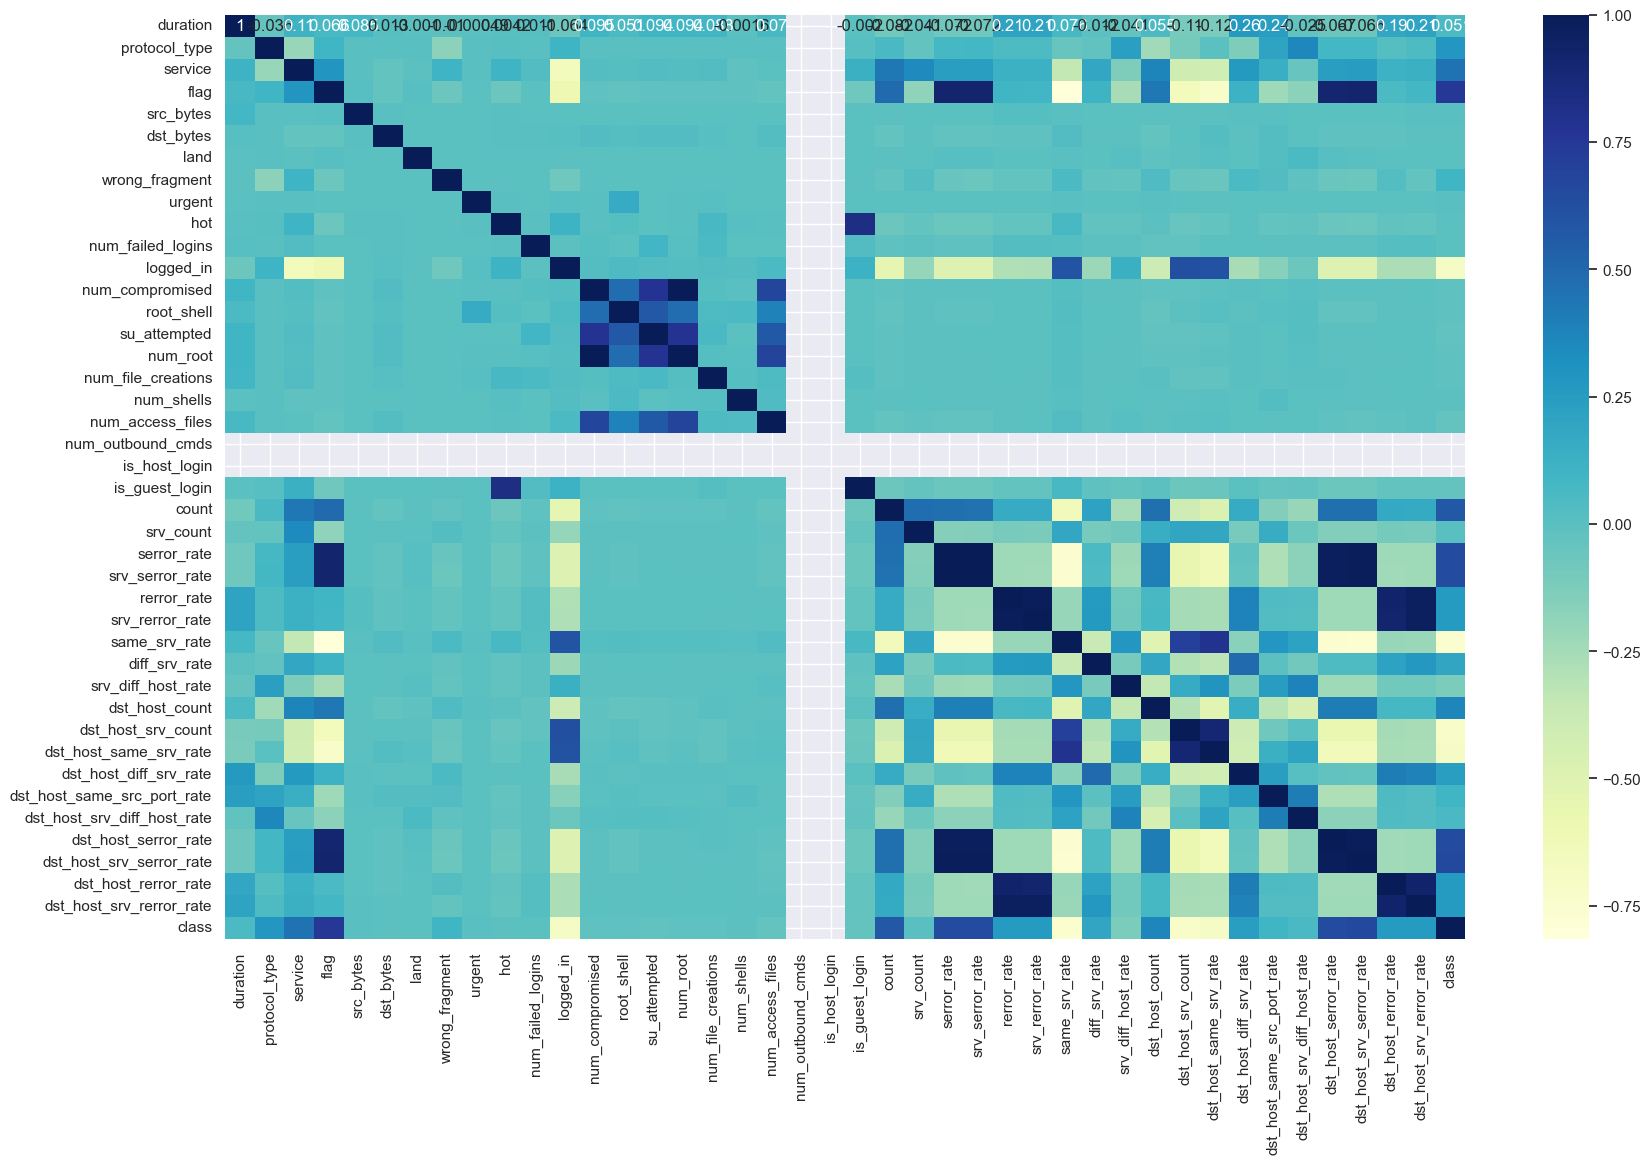

In [22]:
numeric_data = train.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()  
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(corr_matrix, annot=True, fmt='.2g', cmap='YlGnBu')

In [24]:
train['num'] = range(1, 1 + len(train))
test['num'] = range(1, 1 + len(test))
nums = test['num']
train.drop(columns = ["num", "num_outbound_cmds", "is_host_login"] , inplace = True)
test.drop(columns = ["num", "num_outbound_cmds", "is_host_login"] , inplace = True)
train.head()
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,52,4,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,52,4,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,0,2,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,2,33,2,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,6,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [28]:
x = pd.get_dummies(train.drop(['class'], axis=1))
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train['class'])
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(test.values, dtype=torch.float32)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [30]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)   
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)                  
        self.fc4 = nn.Linear(hidden_size3, num_classes)  
        self.relu = nn.ReLU() 
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)  

        out = self.fc2(out)
        out = self.relu(out)
      
        out = self.fc3(out)
        out = self.relu(out)
        
        out = self.fc4(out)  
        out = self.sigmoid(out)
        return out

In [32]:
input_size = x_train_tensor.shape[1]  
hidden_size1 = 64  
hidden_size2 = 128  
hidden_size3 = 64  

num_classes = 2  
model = MLP(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)

criterion = nn.CrossEntropyLoss()  
optimizer = optim.AdamW(model.parameters(), lr=0.001)  

num_epochs = 30  
device = 'cuda' if torch.cuda.is_available() else 'cpu'  
model.to(device)

for epoch in range(num_epochs):  
    model.train()
    for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()  
        outputs = model(x_batch)   
        loss = criterion(outputs, y_batch)  
        loss.backward()  
        optimizer.step()  
        
    model.eval()  
    val_loss = 0
    correct = 0 
    with torch.no_grad():  
        for x_batch, y_batch in val_loader:  
            x_batch, y_batch = x_batch.to(device), y_batch.to(device) 
            outputs = model(x_batch)
            val_loss += criterion(outputs, y_batch).item() 
            pred = outputs.argmax(dim=1, keepdim=True) 
            correct += pred.eq(y_batch.view_as(pred)).sum().item() 
    
    val_loss /= len(val_loader.dataset)  
    accuracy = 100 * correct / len(val_loader.dataset)  
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss}, Val Accuracy: {accuracy:.2f}%')

Epoch 1, Loss: 0.3132631182670593, Val Loss: 0.011073069809968332, Val Accuracy: 96.01%
Epoch 2, Loss: 0.43234869837760925, Val Loss: 0.011034552393084505, Val Accuracy: 96.15%
Epoch 3, Loss: 0.43335482478141785, Val Loss: 0.011343261142362794, Val Accuracy: 94.96%
Epoch 4, Loss: 0.3532618582248688, Val Loss: 0.011098544171557206, Val Accuracy: 95.89%
Epoch 5, Loss: 0.31326186656951904, Val Loss: 0.011011847281744614, Val Accuracy: 96.19%
Epoch 6, Loss: 0.3532886207103729, Val Loss: 0.01097220311942709, Val Accuracy: 96.33%
Epoch 7, Loss: 0.3532618582248688, Val Loss: 0.010993615795303181, Val Accuracy: 96.19%
Epoch 8, Loss: 0.39326193928718567, Val Loss: 0.010967162203566378, Val Accuracy: 96.35%
Epoch 9, Loss: 0.3532618582248688, Val Loss: 0.010959703248274376, Val Accuracy: 96.33%
Epoch 10, Loss: 0.553261935710907, Val Loss: 0.01157063339811205, Val Accuracy: 94.38%
Epoch 11, Loss: 0.3932618796825409, Val Loss: 0.011459316903812872, Val Accuracy: 94.72%
Epoch 12, Loss: 0.42933493852

In [34]:
model.eval()
with torch.no_grad():
    y_test_pred = model(x_test_tensor.to(device))  
    y_test_pred = torch.argmax(y_test_pred, dim=1).cpu().numpy()

submission = pd.DataFrame({'num': nums, 'class': y_test_pred})
submission['class'] = submission['class'].astype(bool)
submission.to_csv('nid_useMLP_L4.csv', index=False)